#### 정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self,X, y=None):
        pass
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i]=0
            else:
                pred[i]=1
        return pred


In [3]:
from sklearn.preprocessing import LabelEncoder
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#data를 재로딩, 가공, 학습 데이터/테스트 데이터 분할
titanic_df=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/파이썬 머신러닝 완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

#Dummy Classifier 이용해 학습 예측 평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions =myclf.predict(X_test)
print(accuracy_score(y_test,mypredictions))

0.8324022346368715


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros( ( len(X),1),dtype=bool)
    
digits=load_digits()
y=(digits.target==7).astype(int)
X_train,X_test,y_train,y_test=train_test_split(digits.data,y, random_state=11)

In [6]:
print('레이블 테스트 세트 크기:',y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

#Dummy Classifier로 학습 / 예측 / 정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : ',accuracy_score(y_test,fakepred))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는 :  0.9


### 오차행렬

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

### 정밀도와 재현율

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    print('오차행렬\n',confusion)
    print('정확도:',accuracy,'정밀도:',precision,'재현율:',recall)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df=pd.read_csv('C:/Users/dudtj/OneDrive - 숭실대학교 - Soongsil University/Desktop/CL/python/파이썬 머신러닝 완벽가이드/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)
lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현율: 0.7868852459016393


### 정밀도/재현율 트레이드오프

In [10]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape:',pred_proba.shape)
print('pred_proba array에서 앞 3개만 샘플로 추출\n',pred_proba[:3])

#예측 확률 array와 예측 결과값 array를 병합해 예측 확률과 결괏값을 한눈에 확인한다.
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측\n',pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출
 [[0.4623509  0.5376491 ]
 [0.87875882 0.12124118]
 [0.87717457 0.12282543]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측
 [[0.4623509  0.5376491  1.        ]
 [0.87875882 0.12124118 0.        ]
 [0.87717457 0.12282543 0.        ]]


In [11]:
from sklearn.preprocessing import Binarizer
X=[[1, -1, 2],
   [2, 0, 0],
   [0, 1.1, 1.2]]
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))
# 1.1보다 같거나 작으면 0 , 크면 1로 변환

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [12]:
from sklearn.preprocessing import Binarizer
custom_threshold=0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현율: 0.7868852459016393


In [13]:
custom_threshold=0.4
pred_proba_1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)

get_clf_eval(y_test,custom_predict)

오차행렬
 [[98 20]
 [10 51]]
정확도: 0.8324022346368715 정밀도: 0.7183098591549296 재현율: 0.8360655737704918


In [14]:
thresholds =[0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(custom_threshold)
        get_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

0.4
오차행렬
 [[98 20]
 [10 51]]
정확도: 0.8324022346368715 정밀도: 0.7183098591549296 재현율: 0.8360655737704918
0.45
오차행렬
 [[103  15]
 [ 12  49]]
정확도: 0.8491620111731844 정밀도: 0.765625 재현율: 0.8032786885245902
0.5
오차행렬
 [[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도: 0.7741935483870968 재현율: 0.7868852459016393
0.55
오차행렬
 [[109   9]
 [ 15  46]]
정확도: 0.8659217877094972 정밀도: 0.8363636363636363 재현율: 0.7540983606557377
0.6
오차행렬
 [[112   6]
 [ 16  45]]
정확도: 0.8770949720670391 정밀도: 0.8823529411764706 재현율: 0.7377049180327869


In [15]:
from sklearn.metrics import precision_recall_curve
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

precisions ,recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:' , thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:',thr_index)

print('샘플 임게값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임게값별 재현율:',np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플 임게값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임게값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


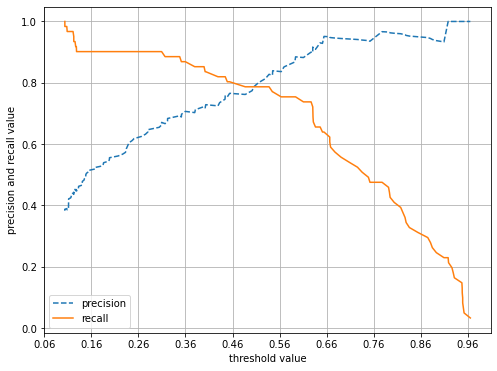

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:thresholds_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:thresholds_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('threshold value'); plt.ylabel('precision and recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

임계값에 따라 정밀도와 재현율이 반비례해짐을 볼 수 있다.

### 정밀도와 재현율의 맹점

두 개의 수치를 상호 보완할 수 있는 수준에서 적용하여야 한다. 단지 하나의 수치만 높다고 좋은 방법이 아니다.

### F1 스코어

In [17]:
from sklearn.metrics import f1_score
f1= f1_score(y_test,pred)
print('F1 스코어',f1)

F1 스코어 0.7804878048780488


In [18]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test, pred)
    f1=f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:',accuracy,'정밀도',precision,'재현율',recall,'F1','f1')
    
thresholds=[0.4,0.45,0.5,0.55,0.6]
pred_proba=lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324022346368715 정밀도 0.7183098591549296 재현율 0.8360655737704918 F1 f1
0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8491620111731844 정밀도 0.765625 재현율 0.8032786885245902 F1 f1
0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8491620111731844 정밀도 0.7741935483870968 재현율 0.7868852459016393 F1 f1
0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659217877094972 정밀도 0.8363636363636363 재현율 0.7540983606557377 F1 f1
0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8770949720670391 정밀도 0.8823529411764706 재현율 0.7377049180327869 F1 f1


In [22]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class1)
thr_index=np.arange(1,thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index:',thr_index)
print('샘플 index로 추출한 임곗값:',np.round(thresholds[thr_index],2))

print('샘플 임곗값별 FPR:',np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:',np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


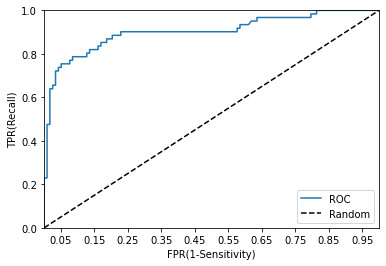

In [23]:
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test,pred_proba[:,1])

In [26]:
from sklearn.metrics import roc_auc_score

pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test,pred_proba)
print('roc auc 값:',roc_score)

roc auc 값: 0.9025423728813561


In [30]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test, pred)
    f1=f1_score(y_test,pred)
    
    #roc-auc 추가
    roc_auc=roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:',accuracy,'정밀도',precision,'재현율',recall,'F1',f1,'AUC',roc_auc)